# Dataset Misra1a

In [51]:
library(ggplot2)
library(MASS)

In [63]:
data = read.table("./Misra1a.txt", header = T)
head(data)

y,x
10.07,77.6
14.73,114.9
17.94,141.1
23.93,190.8
29.61,239.9
35.18,289.0


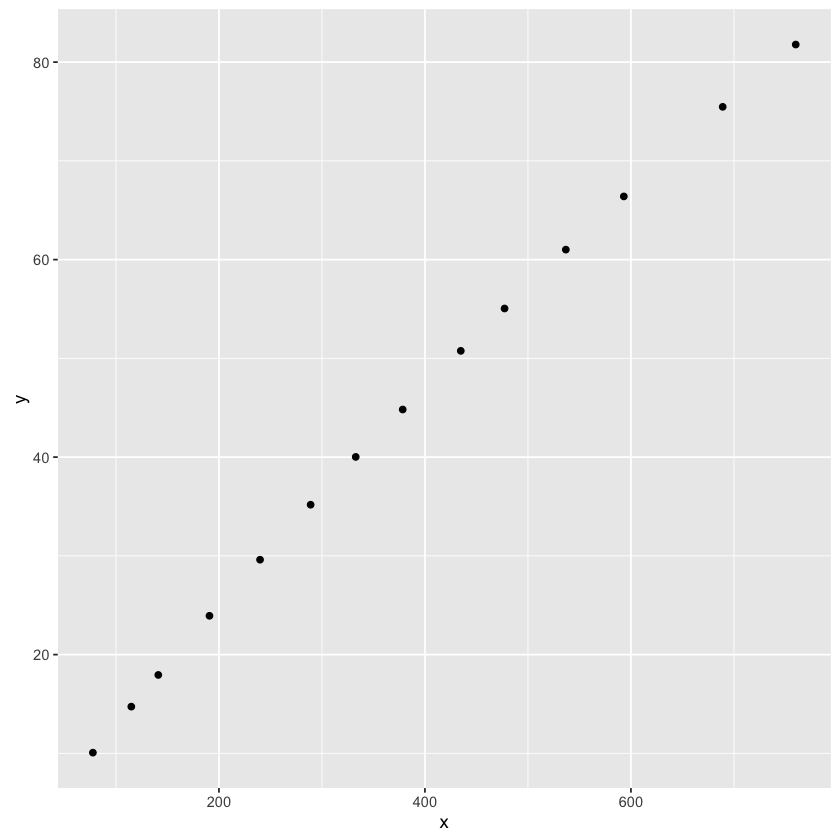

In [64]:
ggplot(aes(x=x, y=y), data=data) + geom_point()

In [117]:
# funcion a ajustar
f   <- function(x, beta1, beta2) beta1 * (1 - exp(- x * beta2))
    
# Parciales
fb1 <- function(x, beta1, beta2) 1 - exp(- x * beta2)
fb2 <- function(x, beta1, beta2) x * beta1 * exp(-beta2 * x)
    
# Funcion de errores
gi <- function(x, beta1, beta2, y) f(x, beta1, beta2) - y

In [109]:
# betas iniciales
beta1_k <- 250
beta2_k <- 0.0005
Beta_k <- matrix(c(beta1_k, beta2_k), ncol=1)

for (i in 1:500){
    g  <- matrix(gi(data$x, beta1_k, beta2_k, data$y))
    Jb <- matrix(c(fb1(data$x, beta1_k, beta2_k), fb2(data$x, beta1_k, beta2_k)), ncol = 2)

    Beta_k <- Beta_k - ginv(t(Jb) %*% Jb) %*% t(Jb) %*% g
    beta1_k <- Beta_k[1]
    beta2_k <- Beta_k[2]
}

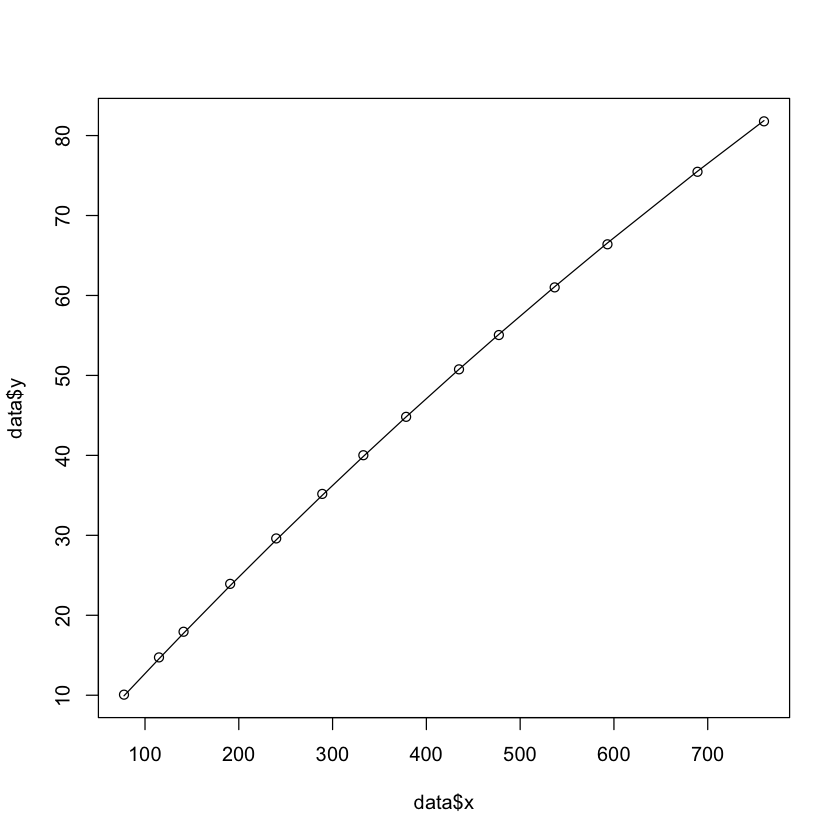

In [110]:
plot(data$x, data$y)
lines(data$x, f(data$x, beta1_k, beta2_k))

In [116]:
Beta_k[1]

[1] 250

In [115]:
beta2_k

[1] 0.0005220257